# Lecture 8: Data Cleaning and Exploratory Data Analysis

## 4/8/19

### Table of Contents
1. [Introduction to Kaggle](#kaggle)
2. [Datascience Workflow](#workflow)  
3. [Data Cleaning](#data-cleaning)  
    3.1 [Missing Values](#missing)  
    3.2 [Categorical Variables](#categorical)     
4. [Exploratory Data Analysis (EDA)](#eda)   
    4.1 [Outliers](#outliers)   
    4.2 [Distribution](#dist)   
    4.3 [Relationships](#rels)   
5. [Model Creation](#model)   
    5.1 [One-Hot Encoding](#one-hot)    
    5.2 [Preprocessing Function](#preprocess)  
6. [Model Evaluation](#evaluation)
7. [Model Selection](#select)
8. [References/Resources](#ref)

### Hosted by and maintained by the [Statistics Undergraduate Students Association (SUSA)](https://susa.berkeley.edu). Authored by [Rosa Choe](mailto:rosachoe@berkeley.edu).

<a id='kaggle'></a>

## 1. Introduction to Kaggle
Kaggle is an online platform that hosts machine learning and data analysis competitions. Anyone can create a private Kaggle competition, but there are a lot of public Kaggle competitions hosted by companies, many of which have monetary prizes! Generally the goal of a Kaggle competition is to make a model that accurately predicts a value or classifies data into categories. Participants are given a training dataset with features and labels, as well as an unlabeled test set that will be used to evaluate your final model.

Over the next few weeks, you will be participating in a Kaggle competition, learning new skills each week to help improve your models! 


<a id='workflow'></a>

## 2. Datascience Workflow

Although not a hard and fast rule, there is a rough guideline for how you should approach solving data science problems. We'll go through each of these steps in more detail during this lecture, but this is a brief overview for what the datascience workflow looks like:


<figure>
    <img src="workflow.png" width="400">
    <figcaption style='text-align: center'>From <a href='https://resources.github.com/downloads/development-workflows-data-scientists.pdf'>Development Workflows for Data Scientists</a></figcaption>
</figure>



We've talked about making models and visualizations in previous lectures – today, we'll be focusing on the `Get the data` and `Explore the data` steps. 

<a id='data-cleaning'></a>

## 3. Data Cleaning

There's a lot of data available online, and if you have a question you want to answer with data analysis, you will likely be able to find a free dataset online. As mentioned already, Kaggle is a great resource for data, since many companies will make their data publicly available so that data scientists around the world can help them answer questions of their own. 

So far, we've either been 1) working with "clean" data, meaning the datasets were generally complete, correct, and of a form making them easy to work with, or 2) conveniently ignoring columns of data that aren't clean. However, not all datasets you come across will be cleaned before they fall in your lap, and ignoring parts of the data that aren't convenient to use won't make for the best models, so you may need to clean the data yourself.

First, let's take a look at what we're dealing with here. We'll be working with the `titanic` data you've seen before, but we'll consider the categorical variables as well this time.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

titanic_train = pd.read_csv('titanic/train.csv')
titanic_test = pd.read_csv('titanic/test.csv')

titanic_train, titanic_val = train_test_split(titanic_train, test_size = .8, random_state = 42)

X_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

X_val = titanic_val.drop('Survived', axis=1)
y_val = titanic_val['Survived']

titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
761,762,0,Third,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,NaN,S
645,646,1,First,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,D33,C
754,755,1,Second,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
556,557,1,First,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
850,851,0,Third,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S


As you can see already, the `Cabin` column has some missing values (`NaN`). How do we deal with this?

<a id='missing'></a>
### 3.1 Missing Values

Let's see where the `NaN`s are. We can count how many `NaN`s are in each column using the `isna()` and `sum()` functions. We're basically converting every value in the dataframe to `True` and `False` values based on whether they are `NaN`, and summing across columns. 

In [2]:
titanic_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             33
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          132
Embarked         0
dtype: int64

In [3]:
titanic_train.shape

(178, 12)

Dang! `Cabin` has a lot of missing values. There are only 891 values in the `titanic_train` dataframe, and a majority of them are missing. With missing values we have a couple options. The first is *dropping features*.

#### Option 1: Dropping Features

We might think "hey, if most of the values don't have a value for `cabin`, we should probably just get rid of this column". If we want to do that, we could just drop a column in the following way:

In [4]:
titanic_dropped_col = titanic_train.drop('Cabin', axis=1)
titanic_dropped_col.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
761,762,0,Third,"Nirva, Mr. Iisakki Antino Aijo",male,41.0,0,0,SOTON/O2 3101272,7.1250,S
645,646,1,First,"Harper, Mr. Henry Sleeper",male,48.0,1,0,PC 17572,76.7292,C
754,755,1,Second,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,S
556,557,1,First,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,C
850,851,0,Third,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,S


Easy! However, what if we lost some valuable information by dropping that column? We'll go into more Exploratory Data Analysis (EDA) later, but there are some small exploratory steps we can take to inform our data cleaning. For example, just for fun, let's take a look at the survival rates between passengers that had a value for `Cabin` and passengers that did not.

In [5]:
y_train[~titanic_train['Cabin'].isna()].mean()

0.60869565217391308

In [6]:
y_train[titanic_train['Cabin'].isna()].mean()

0.28030303030303028

Wow, that is a non-trivial difference! This is an example of when `NaN` can provide information instead of just being extraneous information. For now, let's keep the `Cabin` column.

#### Option 2: Drop Rows

Another column with a good number of missing values is `Age`, with `177` of `891` being missing. We *could* drop the column, but our knowledge of history might remind us that "women and children" were prioritized, so age could provide valuable information. Alternatively, we can drop rows with missing values for features we think are important. We can do this in a very similar way to dropping columns:

In [7]:
titanic_dropped_rows = titanic_train.dropna(axis=0, subset=['Age'])
print(titanic_dropped_rows.isna().sum())
print(titanic_dropped_rows.shape, titanic_train.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          103
Embarked         0
dtype: int64
(145, 12) (178, 12)


Now we don't have any `NaN` values in `Age` and we kept all of the original features, but we have fewer rows than we did before!

#### Option 3: Impute Values

It's always better to have more data to train on, so we are losing some information by dropping columns. How can we keep all of the observations in our training data while also getting rid of `NaN`s? We can try to *impute* or guess what the values should be based on the present values. How you impute depends on your data. 

For example, for `Age`, we might want to fill in the `NaN` values with the average age. We can do this using the `fillna()` function.

In [8]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())
print(titanic_train.isna().sum())
print(titanic_train.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          132
Embarked         0
dtype: int64
(178, 12)


We've managed to remove the `NaN` values, without reducing the number of observations in our training set! However, clearly this method won't work on `Cabin` and `Embarked`, because these are categorical variables with no concept of average.

Let's take a look at `Embarked`, which describes the location where a passenger boarded the ship.

In [9]:
titanic_train['Embarked'].value_counts(dropna=False)

S    134
C     29
Q     15
Name: Embarked, dtype: int64

In this case, we could impute the `NaN` values by assigning the most common location that passengers boarded from. If over 70% of the passengers boarded from Southampton, it is likely that the 2 missing values also boarded at Southampton.

In [10]:
titanic_train['Embarked'] = titanic_train['Embarked'].fillna(titanic_train['Embarked'].value_counts().idxmax())
titanic_train['Embarked'].value_counts(dropna=False)

S    134
C     29
Q     15
Name: Embarked, dtype: int64

Once again, we've managed to remove the missing values without reducing the our training size!

Going back to the first example with `Cabin`, since we'd like to not have the `NaN`, but we want to keep information about the `Cabin`, we can make a new category to represent that there was no `Cabin` value assigned. Let's just fill it in with the value "U" for *unassigned*.

In [11]:
titanic_train['Cabin'] = titanic_train['Cabin'].fillna('U')
titanic_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Yay! No more missing values

<a id='categorical'></a>
### 3.2 Categorical Variables / String Processing

Let's revisit the categorical variables. They have values that are represented by strings, and we need to make sure these values are also clean.


#### Ordered Categorical Variables
Let's look at `Pclass`. This is a categorical variable, but there is a clear ordering to the possible values for `Pclass`, since there's a direct translation from `First -> 1`, `Second -> 2`, and `Third -> 3`. 



In [12]:
from pandas.api.types import CategoricalDtype
class_categories = CategoricalDtype(categories=["First", "Second", "Third"], ordered=True)
titanic_train["Pclass"] = titanic_train["Pclass"].astype(class_categories)
titanic_train["Pclass"].head()

761     Third
645     First
754    Second
556     First
850     Third
Name: Pclass, dtype: category
Categories (3, object): [First < Second < Third]

In [13]:
titanic_train["Pclass"] = titanic_train["Pclass"].cat.codes
titanic_train["Pclass"].head()

761    2
645    0
754    1
556    0
850    2
Name: Pclass, dtype: int8

Now, let's move on to the other non-numeric features: `Name`, `Ticket`, and `Cabin`.

We should probably drop `Name` for several reasons:
    1. Names are (mostly) unique
    2. A passenger's name probably affect their chances of survival
    3. Passengers in the test set probably won't have the same names as those in the training set (because of uniqueness)

The same goes for `PassengerId`, which is basically just used as an index, but we can index without it, so let's drop both `Name` and `PassengerId`

In [14]:
titanic_train = titanic_train.drop(['Name', 'PassengerId'], axis=1)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
761,0,2,male,41.0,0,0,SOTON/O2 3101272,7.1250,U,S
645,1,0,male,48.0,1,0,PC 17572,76.7292,D33,C
754,1,1,female,48.0,1,2,220845,65.0000,U,S
556,1,0,female,48.0,1,0,11755,39.6000,A16,C
850,0,2,male,4.0,4,2,347082,31.2750,U,S


Now for `Ticket`. Let's look at what kinds of values are contained in `Ticket`.

In [15]:
titanic_train['Ticket'].value_counts()

PC 17572             3
367230               2
CA 2144              2
CA. 2343             2
31027                2
243847               2
113760               2
347082               2
347054               2
36973                2
3101278              2
239853               2
12749                1
349243               1
113784               1
2671                 1
C.A. 33595           1
19952                1
19950                1
13507                1
110465               1
35851                1
349241               1
382651               1
350026               1
2665                 1
364512               1
111240               1
SC 1748              1
347064               1
                    ..
A4. 54510            1
349207               1
14312                1
113798               1
323951               1
STON/O 2. 3101275    1
347466               1
112053               1
17421                1
113781               1
PC 17604             1
3101277              1
P/PP 3381  

There are 681 unique values in the `Ticket` column, with many of them occurring with frequency 1. You might notice some of the values have common prefixes like `"SOTON"`, and you could try to extract these prefixes and group by them to get more informative categories, but that requires using regular expressions and pandas' `str` functions. You can find more information [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html). But for today, we will just drop this column.

In [16]:
titanic_train = titanic_train.drop('Ticket', axis=1)
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
761,0,2,male,41.0,0,0,7.1250,U,S
645,1,0,male,48.0,1,0,76.7292,D33,C
754,1,1,female,48.0,1,2,65.0000,U,S
556,1,0,female,48.0,1,0,39.6000,A16,C
850,0,2,male,4.0,4,2,31.2750,U,S


Finally, let's look at `Cabin`. Earlier, we noticed that the survival rates between those with `Cabin` defined and those without were noticeably different. Turns out, the first letter of the `Cabin` value represents the deck the passenger was in.

<img src='cabin.png' style='width: 300px'></img>

Intuitively it might make sense that those residing in decks closer to the sundeck (top of the ship) were able to get to safety faster, so let's keep the deck letter from `Cabin`. Since we know that it's just the first letter of the `Cabin` value, we can just extract the first letter from the string.

In [17]:
titanic_train['Cabin'] = titanic_train['Cabin'].str[0]
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
761,0,2,male,41.0,0,0,7.1250,U,S
645,1,0,male,48.0,1,0,76.7292,D,C
754,1,1,female,48.0,1,2,65.0000,U,S
556,1,0,female,48.0,1,0,39.6000,A,C
850,0,2,male,4.0,4,2,31.2750,U,S


Let's take a look at the values.

In [18]:
titanic_train['Cabin'].value_counts()

U    132
C     11
D      9
B      9
E      6
A      4
F      4
G      2
T      1
Name: Cabin, dtype: int64

Hm...there's a value for `Cabin` that's `T`, but there's only one and in the image above, there's no deck labeled `T`. This was probably an error, so let's drop the row that has `Cabin = T`.

In [19]:
titanic_train = titanic_train[titanic_train['Cabin'] != 'T']

Yay! We're done with data cleaning.

<a id='eda'></a>

## 4. Exploratory Data Analysis (EDA)

Now that we have our cleaned data, let's try to see if we can find any patterns in the data to explore. We can do this using *visualizations* (which we learned how to do in a previous lecture), just looking at the raw data, and summarizing our data in different ways.

You might have noticed that we did some of these steps already as part of our data cleaning – namely, looking at the raw data and summarizing. We noticed there were `NaN` values by looking at the raw data and evaluated what kind of data each column contained, which informed our decisions on how to clean our data. We also looked at the counts of `NaN` values in each of the columns, as well as the counts of unique values for some columns to decide whether to drop the column or modify it in some way. We also briefly looked at the survival rates between passengers with assigned `Cabin` values and those without.

All of these steps we took were also part of *exploratory data analysis (EDA)*, which basically consists of initial steps to better understand the data we're working with to better inform our decisions on the model we will make.

This is to say that while we go over individual steps of the "Data Science Workflow", all of the steps are interconnected and cyclical. Revisiting the image from before, notice the arrows flowing in both directions between each step! This is exactly what we've been doing.


<figure>
    <img src="workflow.png" width="400">
    <figcaption style='text-align: center'>From <a href='https://resources.github.com/downloads/development-workflows-data-scientists.pdf'>Development Workflows for Data Scientists</a></figcaption>
</figure>

In [20]:
titanic_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.367232,1.299435,30.272433,0.542373,0.265537,29.099975
std,0.483418,0.849900,11.548604,1.201165,0.676387,37.416803
min,0.000000,0.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,2.000000,30.355172,0.000000,0.000000,13.000000
75%,1.000000,2.000000,36.000000,1.000000,0.000000,30.500000
max,1.000000,2.000000,62.000000,8.000000,5.000000,263.000000


<a id='outliers'></a>

### 4.1 Outliers

If there are outliers in our data, it might be helpful to remove these observations. One way to find outliers is through visualization. We can boxplots to see if there are any outliers.

In [21]:
from matplotlib import pyplot as plt

plt.boxplot(titanic_train['Age']);

In the boxplot, the circles represent outliers, which are defined as values that are greater than `1.5 x IQR` away from the 1st and 3rd quartiles. The `IQR` is the Inner Quartile Range, which is defined as `Q3 - Q1`, or the difference between the 75th percentile (3rd quartile) and the 25th percentile (1st quartile) of values. We can remove outliers by calculating the `IQR` and finding the values which lie within the range `[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]`

(171, 9)


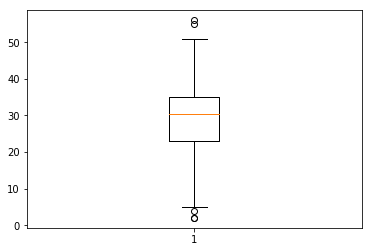

In [22]:
q1 = titanic_train['Age'].quantile(.25)
q3 = titanic_train['Age'].quantile(.75)
iqr = q3 - q1

within_range = (q1 - 1.5*iqr <= titanic_train['Age']) & (titanic_train['Age'] <= q3 + 1.5*iqr)

titanic_outiers_removed = titanic_train[within_range]
print(titanic_outiers_removed.shape)
plt.boxplot(titanic_outiers_removed['Age']);

You may have noticed that there are still outliers in the boxplot. These are actually new ones that weren't considered outliers before. Because we removed some data points, we've changed the quartile values, and thus changed the range of values considered outliers. This is called *masking*, because the outliers that existed before were so extreme they made the IQR large and *masked* other values that could also be considered outliers.

<a id='dist'></a>
### 4.2 Distribution

We can also look at histograms to get an idea of the distribution of values.

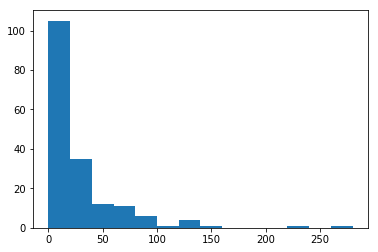

In [23]:
plt.hist(titanic_train['Fare'], bins=range(int(min(titanic_train['Fare'])), int(max(titanic_train['Fare'])) + 20, 20));

<a id='rels'></a>
### 4.3 Relationships

Exploring the relationships between variables is a crucial step of EDA, since our overall goal is to model the relationship between variables in our data.

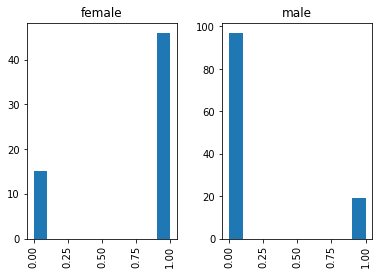

In [24]:
titanic_train.hist('Survived', by=['Sex']);

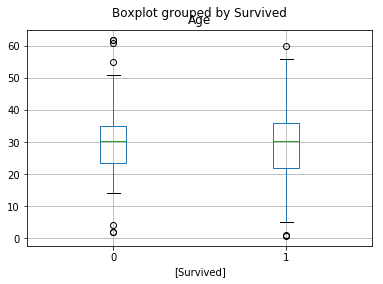

In [25]:
titanic_train.boxplot('Age', by=['Survived']);

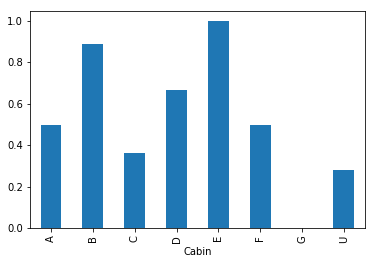

In [26]:
titanic_train.groupby('Cabin')['Survived'].mean().plot.bar()

<a id='model'></a>

## 5. Model Creation

<a id='one-hot'></a>
### One-Hot Encoding
We cleaned the categorical variables earlier, but they're still non-numeric, and for our models, we need to make all of our data numeric. To convert categorical variables to numeric values, we can use a method called *one-hot encoding*. Basically, we will make a new column for each category and set a flag of 1 or 0 – 1 if that observation is in that category, and 0 if it's not.

We basically want to achieve something that looks like this:

<img src='one_hot_1.png' style='width: 500px'></img>

How do we do that? Luckily, pandas has a built-in function called `get_dummies()` that will do the one-hot encoding for us! *One-hot encoding is also called dummy encoding*


In [27]:
pd.get_dummies(titanic_train, columns=['Embarked']).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
761,0,2,male,41.0,0,0,7.1250,U,0,0,1
645,1,0,male,48.0,1,0,76.7292,D,1,0,0
754,1,1,female,48.0,1,2,65.0000,U,0,0,1
556,1,0,female,48.0,1,0,39.6000,A,1,0,0
850,0,2,male,4.0,4,2,31.2750,U,0,0,1


We can also do this for `Sex` and `Cabin`. We could do it separately, but the columns argument takes in a list of column names, so we can do this all at once.

In [28]:
titanic_train = pd.get_dummies(titanic_train, columns=['Embarked', 'Sex', 'Cabin'])
titanic_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U
761,0,2,41.0,0,0,7.1250,0,0,1,0,1,0,0,0,0,0,0,0,1
645,1,0,48.0,1,0,76.7292,1,0,0,0,1,0,0,0,1,0,0,0,0
754,1,1,48.0,1,2,65.0000,0,0,1,1,0,0,0,0,0,0,0,0,1
556,1,0,48.0,1,0,39.6000,1,0,0,1,0,1,0,0,0,0,0,0,0
850,0,2,4.0,4,2,31.2750,0,0,1,0,1,0,0,0,0,0,0,0,1


<a id='preprocess'></a>
### Preprocessing Function

Everything we've done to change the training data, encompassing both data cleaning and one-hot encoding, is called *preprocessing*. We have to preprocess our validation/test data the same way we preprocessed our training data in order to make predictions with our linear model. The easiest way to do this is to create a function that runs all of the preprocessing steps on a given dataset. That way, we can just pass in the datasets and they will be preprocessed in the same way.

In [29]:
def clean_titanic(df):   
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())
    df['Cabin'] = df['Cabin'].fillna('U')
    class_categories = CategoricalDtype(categories=["First", "Second", "Third"], ordered=True)
    df["Pclass"] = df["Pclass"].astype(class_categories)
    df["Pclass"] = df["Pclass"].cat.codes
    df = df.drop(['Name', 'PassengerId'], axis=1)
    df = df.drop('Ticket', axis=1)
    df['Cabin'] = df['Cabin'].str[0]
    df = pd.get_dummies(df, columns=['Embarked', 'Sex', 'Cabin'])
    return df

In [30]:
titanic_val = clean_titanic(titanic_val)
titanic_test = clean_titanic(titanic_test)

In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

X_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

X_val = titanic_val.drop('Survived', axis=1)
y_val = titanic_val['Survived']

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

<a id='evaluation'></a>

## 6. Model Evaluation

We now have multiple models, but we can only use one to make our final predictions on the test set. How do we decide which model to use? We need to evaluate each of these models to figure out which best represents the relationships.

<a id='r-squared'></a>
#### R^2

In [34]:
linear_model.score(X_train, y_train)

0.50141288238527815

In [35]:
lasso_model.score(X_train, y_train)

0.050913354978614045

In [36]:
ridge_model.score(X_train, y_train)

0.49821604891844701

<a id='mse'></a>
#### Mean Squared Error

We can also use mean squared error, which is the loss function we're minimizing.

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
lin_pred_train = np.round(linear_model.predict(X_train))
lasso_pred_train = np.round(lasso_model.predict(X_train))
ridge_pred_train = np.round(ridge_model.predict(X_train))

lin_pred_val = np.round(linear_model.predict(X_val))
lasso_pred_val = np.round(lasso_model.predict(X_val))
ridge_pred_val = np.round(ridge_model.predict(X_val))

In [39]:
mean_squared_error(lin_pred_train, y_train), mean_squared_error(lin_pred_val, y_val)

(0.14689265536723164, 0.2244039270687237)

In [40]:
mean_squared_error(lasso_pred_train, y_train), mean_squared_error(lasso_pred_val, y_val)

(0.34463276836158191, 0.34782608695652173)

In [41]:
mean_squared_error(ridge_pred_train, y_train), mean_squared_error(ridge_pred_val, y_val)

(0.14124293785310735, 0.22019635343618513)

<a id='accuracy'></a>
#### Accuracy

Accuracy represents the percent of values that were correctly predicted.

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(lin_pred_train, y_train), accuracy_score(lin_pred_val, y_val)

(0.85310734463276838, 0.7755960729312763)

In [44]:
accuracy_score(lasso_pred_train, y_train), accuracy_score(lasso_pred_val, y_val)

(0.65536723163841804, 0.65217391304347827)

In [45]:
accuracy_score(ridge_pred_train, y_train), accuracy_score(ridge_pred_val, y_val)

(0.85875706214689262, 0.77980364656381485)

<a id='select'></a>
## 7. Model Selection

The MSE is lowest and accuracy highest for the Ridge regression model, so let's use that one to make our predictions.

In [46]:
predictions = ridge_model.predict(titanic_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Oh, no! There's a `NaN` in the test set that we did not account for in our data cleaning. Let's find it and figure out how to fix it.

In [47]:
titanic_test.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Cabin_U       0
dtype: int64

It's in the `Fare` column, so let's handle it the same way we handled the `NaN`s in the other numeric columns.



In [48]:
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].mean())

In [49]:
predictions = linear_model.predict(titanic_test)

We can use the script below to save our predictions to a `csv` file to submit to Kaggle! Your results will be saved to a file called `submission.csv`.

In [50]:
from save_csv import results_to_csv

results_to_csv(predictions)

## References/Resources

- [A Datascience Workflow - Towards Data Science](https://towardsdatascience.com/a-data-science-workflow-26c3f05a010e)
- [Development Workflows for Data Scientists - Ciara Byrne](https://resources.github.com/downloads/development-workflows-data-scientists.pdf)